# **TP NOTÉ - Visualisation de Données (Master Python Data Science)**

**Dataset :** Tips (Seaborn)

## **1. Configuration et Importation des Données**

Nous commençons par établir l'environnement. Le style 'whitegrid' de Seaborn est choisi pour améliorer la lisibilité, et l'API orientée objet de Matplotlib est préparée.

In [1]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib.lines as mlines

# Configuration esthétique globale
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

# Chargement du dataset tips
tips = sns.load_dataset("tips")

# Inspection rapide de la structure
print("Aperçu des données :")
display(tips.head())
print("-" * 50)
print(tips.info())
print("-" * 50)
display(tips.describe())

Aperçu des données :


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
--------------------------------------------------


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


---

## **2. Analyse de Distribution**

**Choix Méthodologique :**
Nous utilisons une superposition d'Estimation de Densité par Noyau (KDE) et d'un "Rug Plot".

*
**KDE :** Pour visualiser la forme de la distribution sans le biais des "bacs" (bins) de l'histogramme.


*
**Rug Plot :** Pour observer la granularité exacte des données et valider la densité.

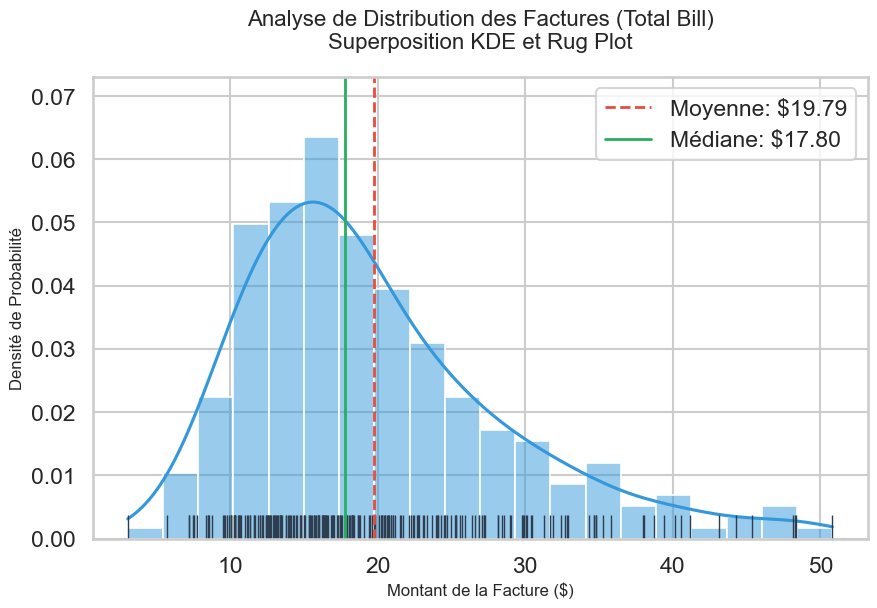

In [2]:
# Création de la figure et des axes (API Orientée Objet)
fig, ax = plt.subplots(figsize=(10, 6))

# 1. Histogramme optimisé avec KDE
sns.histplot(
    data=tips,
    x="total_bill",
    kde=True,             # Ajout de la courbe de densité lisse
    stat="density",       # Normalisation
    color="#3498db",      # Bleu professionnel
    edgecolor="white",
    linewidth=1.2,
    alpha=0.5,
    bins=20,              # Choix explicite de bins pour éviter le défaut
    ax=ax
)

# 2. Rug Plot pour voir les observations individuelles
sns.rugplot(
    data=tips,
    x="total_bill",
    color="#2c3e50",
    height=0.05,
    ax=ax
)

# 3. Annotations et Lignes de référence
ax.set_title("Analyse de Distribution des Factures (Total Bill)\nSuperposition KDE et Rug Plot", pad=20)
ax.set_xlabel("Montant de la Facture ($)")
ax.set_ylabel("Densité de Probabilité")

mean_val = tips["total_bill"].mean()
median_val = tips["total_bill"].median()

ax.axvline(mean_val, color='#e74c3c', linestyle='--', linewidth=2, label=f'Moyenne: ${mean_val:.2f}')
ax.axvline(median_val, color='#27ae60', linestyle='-', linewidth=2, label=f'Médiane: ${median_val:.2f}')

ax.legend()
plt.show()

**Interprétation Critique :**
La distribution est asymétrique à droite (skewness positif). La médiane ($17,80$) est inférieure à la moyenne ($19,79$), indiquant que quelques factures élevées tirent la moyenne vers le haut. Le rug plot confirme que la densité chute significativement après $40$.

---

## **3. Analyse de Relation avec Transformation**

**Transformation :** Création de la variable `tip_pct` (pourcentage du pourboire). Cela permet d'analyser la générosité relative plutôt que le montant absolu, corrigeant l'hétéroscédasticité .

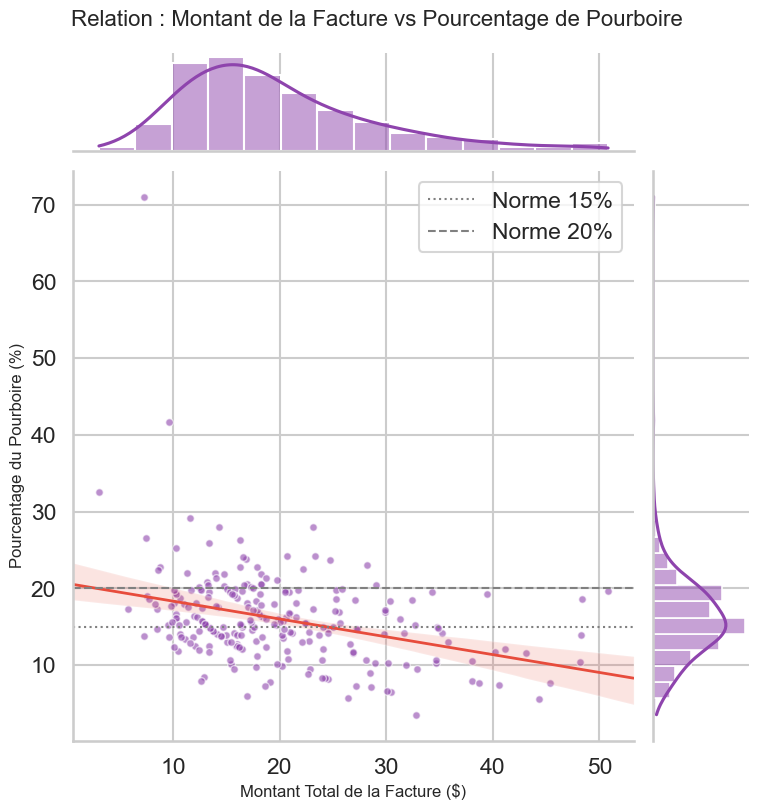

In [3]:
# 1. Ingénierie des fonctionnalités (Transformation)
tips["tip_pct"] = (tips["tip"] / tips["total_bill"]) * 100

# 2. Visualisation : JointPlot avec Régression
g = sns.jointplot(
    data=tips,
    x="total_bill",
    y="tip_pct",
    kind="reg",           # Régression linéaire et distributions marginales
    truncate=False,
    color="#8e44ad",
    height=8,
    scatter_kws={"s": 30, "alpha": 0.6, "edgecolor": "w"},
    line_kws={"color": "#e74c3c", "linewidth": 2}
)

# 3. Personnalisation
g.fig.suptitle("Relation : Montant de la Facture vs Pourcentage de Pourboire", fontsize=16, y=1.02)
g.set_axis_labels("Montant Total de la Facture ($)", "Pourcentage du Pourboire (%)")

# 4. Lignes de référence comportementales (Normes US)
g.ax_joint.axhline(15, color='gray', linestyle=':', linewidth=1.5, label='Norme 15%')
g.ax_joint.axhline(20, color='gray', linestyle='--', linewidth=1.5, label='Norme 20%')
g.ax_joint.legend(loc='upper right')

plt.show()

**Interprétation Critique :**
On observe une légère corrélation négative (pente descendante rouge). C'est un effet "entonnoir" : la variance des pourcentages est très élevée pour les petites factures, mais converge vers la norme 15-20% quand la facture augmente .

---

## **4. Analyse Catégorielle Avancée**

**Choix Méthodologique :** Approche hybride `Catplot` (Box Plot) + `Swarm Plot`.
Cela montre à la fois le résumé statistique (boîte) et la réalité physique du volume de clients (points), rendant la donnée tangible pour les non-techniciens.

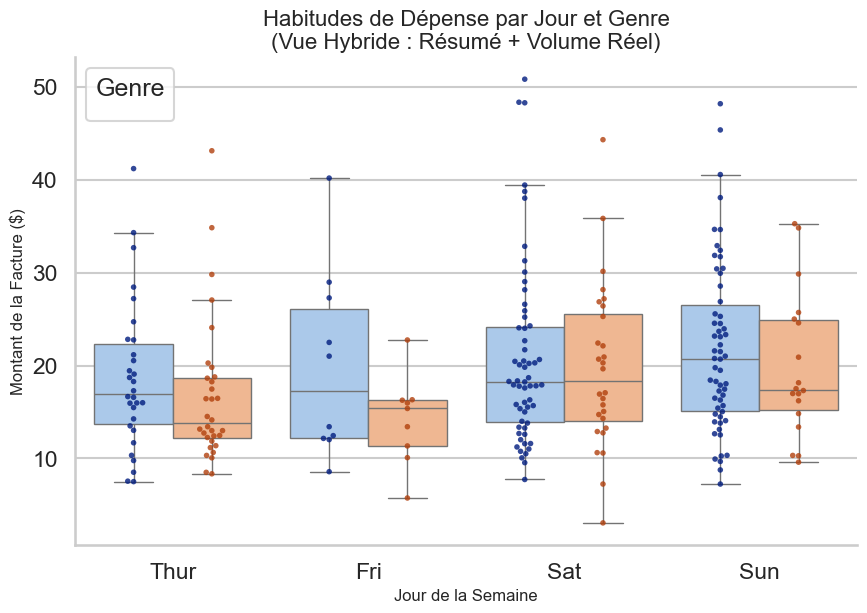

In [4]:
# Ordre explicite des jours (Ordinal)
day_order = ["Thur", "Fri", "Sat", "Sun"]

# 1. Graphique composite
g = sns.catplot(
    data=tips,
    x="day",
    y="total_bill",
    hue="sex",
    kind="box",            # La boîte pour le résumé
    order=day_order,
    palette="pastel",
    height=6,
    aspect=1.5,
    legend=False,
    dodge=True,
    fliersize=0            # On cache les outliers du boxplot car le swarm les montrera
)

# 2. Superposition Swarm Plot (Les données réelles)
sns.swarmplot(
    data=tips,
    x="day",
    y="total_bill",
    hue="sex",
    order=day_order,
    palette="dark",
    dodge=True,
    size=4,
    alpha=0.8,
    ax=g.ax
)

# 3. Esthétique pour "Public Non Technique"
g.ax.set_title("Habitudes de Dépense par Jour et Genre\n(Vue Hybride : Résumé + Volume Réel)", fontsize=16)
g.ax.set_xlabel("Jour de la Semaine")
g.ax.set_ylabel("Montant de la Facture ($)")

# Légende nettoyée
handles, labels = g.ax.get_legend_handles_labels()
g.ax.legend(handles[2:], labels[2:], title="Genre", loc="upper left", frameon=True)

plt.show()

**Interprétation Critique :**
Cette vue révèle non seulement que les dépenses augmentent le week-end, mais le "nuage" de points montre clairement que le **Vendredi** a un volume de clients très faible comparé aux autres jours, une information opérationnelle cruciale masquée par de simples moyennes.

---

## **5. Visualisation Matplotlib Avancée**

**Concept :** Diagramme à barres des moyennes avec coloration conditionnelle (Week-end vs Semaine) pour attirer l'attention pré-attentive.

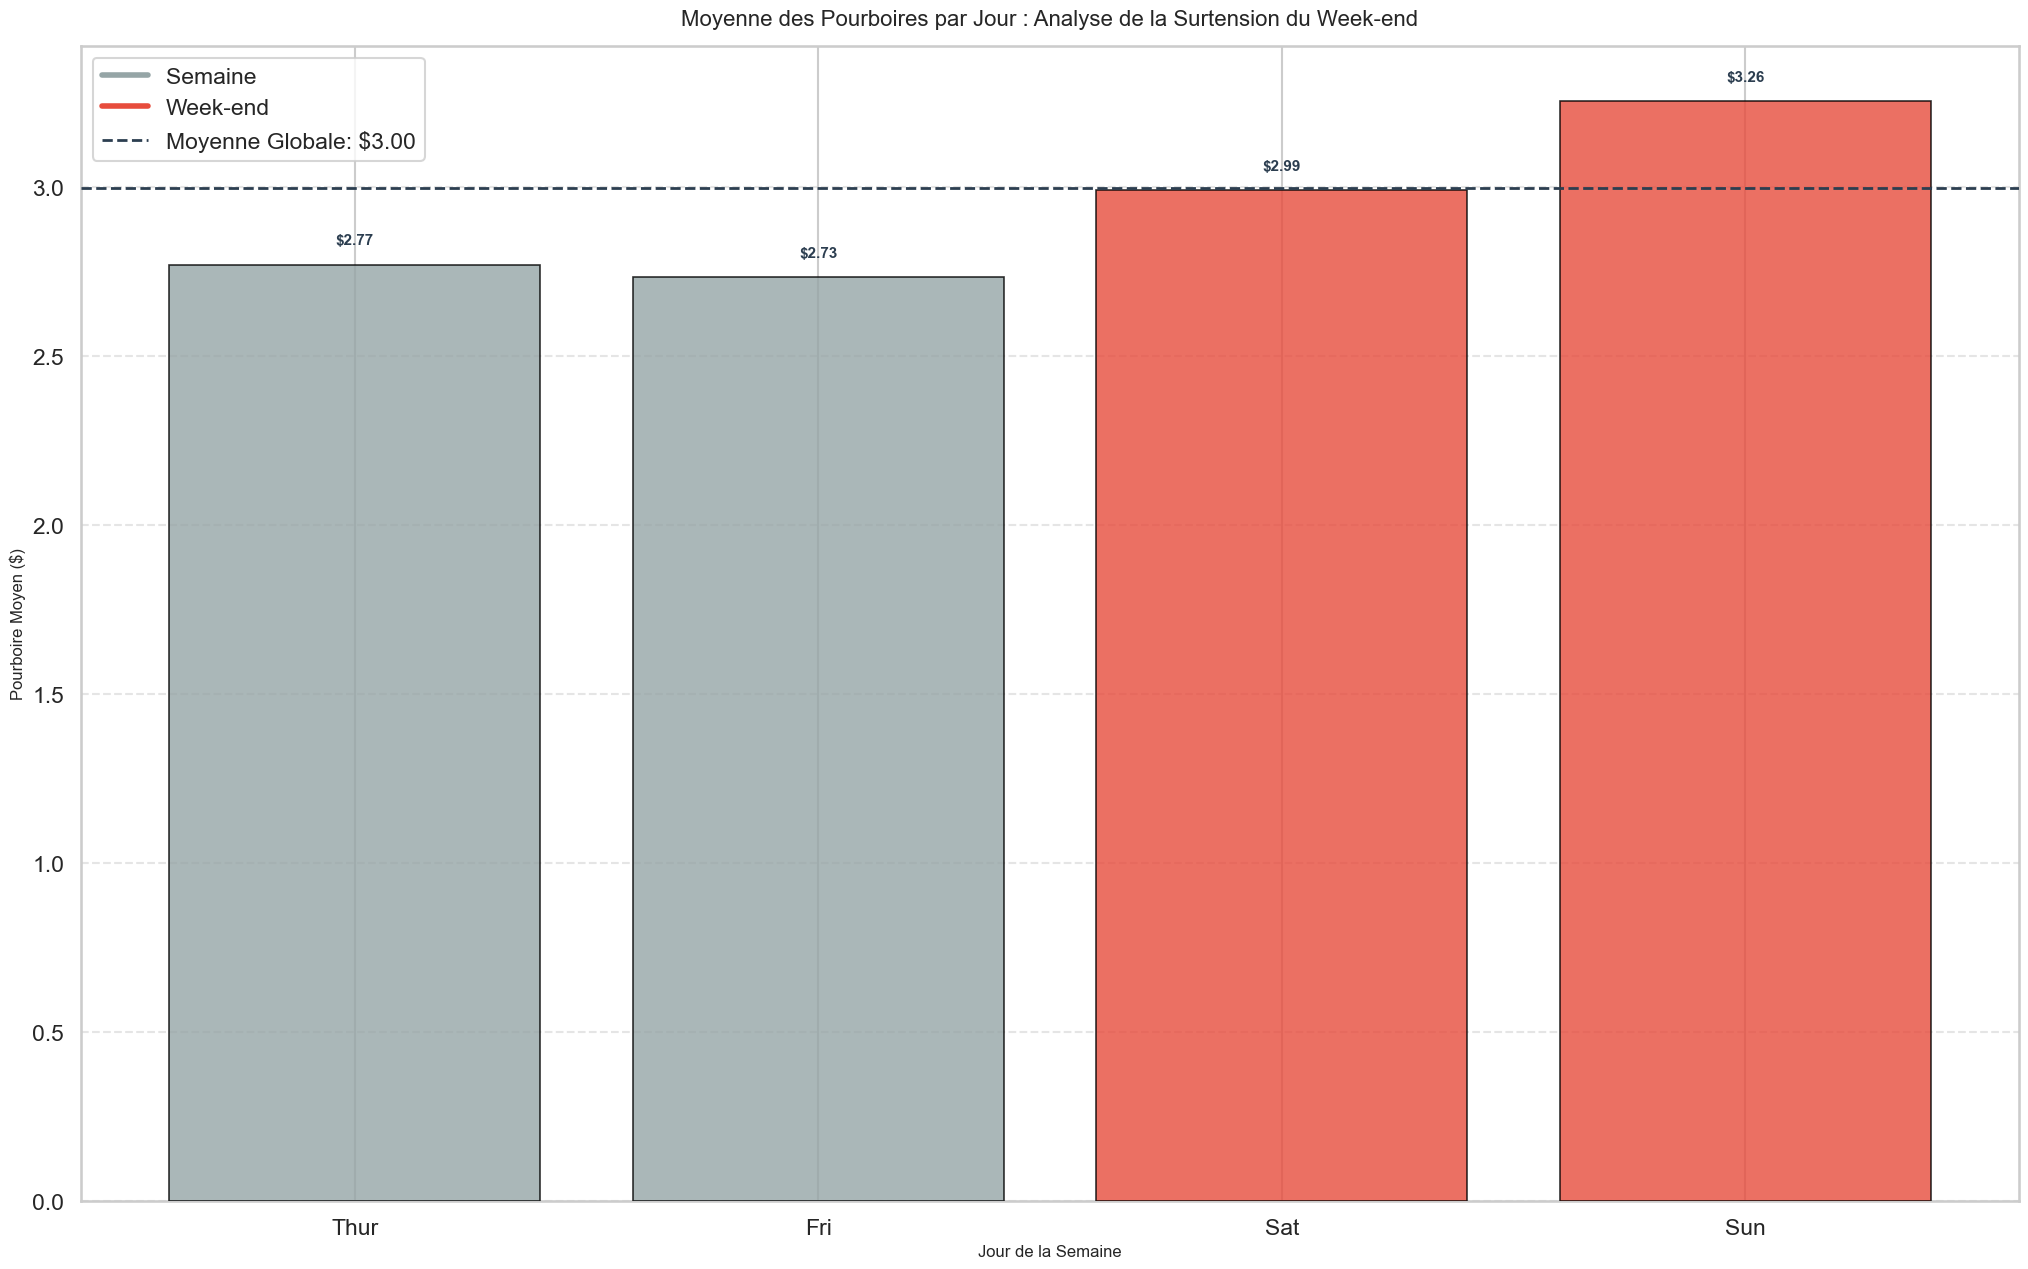

In [5]:
# 1. Agrégation manuelle des données (Pandas pur)
daily_tips_mean = tips.groupby("day", observed=True)["tip"].mean().reindex(day_order)
global_mean_tip = tips["tip"].mean()

# 2. Logique de Couleur Conditionnelle
colors = []
for day in day_order:
    if day in ["Sat", "Sun"]:
        colors.append("#e74c3c")  # Rouge pour le Week-end (Alerte/Pic)
    else:
        colors.append("#95a5a6")  # Gris pour la Semaine (Neutre)

# 3. Création Figure/Axes (Matplotlib pur)
fig, ax = plt.subplots(figsize=(25, 15))

# 4. Tracé des Barres
bars = ax.bar(
    x=daily_tips_mean.index,
    height=daily_tips_mean.values,
    color=colors,
    edgecolor="black",
    linewidth=1.2,
    alpha=0.8,
    zorder=3
)

# 5. Ligne de référence
line = ax.axhline(
    y=global_mean_tip,
    color="#2c3e50",
    linestyle="--",
    linewidth=2,
    label=f"Moyenne Globale: ${global_mean_tip:.2f}",
    zorder=4
)

# 6. Personnalisation avancée
ax.set_title("Moyenne des Pourboires par Jour : Analyse de la Surtension du Week-end", pad=15)
ax.set_ylabel("Pourboire Moyen ($)")
ax.set_xlabel("Jour de la Semaine")
ax.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)

# Légende manuelle (Custom Artists)
legend_elements = [
    mlines.Line2D([], [], color='#95a5a6', lw=4, label='Semaine'),
    mlines.Line2D([], [], color='#e74c3c', lw=4, label='Week-end'),
    line
]
ax.legend(handles=legend_elements, loc='upper left')

# 7. Annotations Textuelles
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2.,
        height + 0.05,
        f'${height:.2f}',
        ha='center', va='bottom', fontsize=11, fontweight='bold', color="#2c3e50"
    )

plt.show()

---

## **6. Analyse Critique et Limites**

Conformément à la consigne finale, voici une analyse des biais et limites de notre étude :

1. **Biais de Sélection et Temporel :** Le dataset date de 1995. Les normes de pourboire (alors 15%, aujourd'hui souvent 20%) et l'inflation rendent les valeurs absolues obsolètes pour une analyse actuelle. De plus, il s'agit d'un seul restaurant, pas d'un échantillon aléatoire.


2. **Paradoxe de Simpson :** En agrégeant les données (comme dans le graphique Matplotlib ci-dessus), nous risquons de masquer des tendances inverses dans les sous-groupes. Par exemple, les fumeurs pourraient paraître moins généreux au global, alors qu'ils pourraient l'être plus à montant de facture égal, mais commandent simplement des repas moins chers .


3. **Information Non Observable :** La variable la plus critique, la **Qualité du Service**, est absente. Nous visualisons les conséquences (le pourboire) sans pouvoir prouver la cause (service vs radinerie).


4. **Biais Visuel Potentiel :** Si nous avions tronqué l'axe Y de notre graphique à barres (en commençant à $2$ au lieu de $0$), la différence entre le Dimanche et le Vendredi aurait paru immense (manipulation visuelle), alors qu'elle n'est que de quelques centimes.